## Importation des Bibliothèques

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import mne

## Définition des variables

In [4]:
Fe=100
dt=1/Fe
t = np.arange(7950000)*dt

In [5]:
# Importation d'un Signal EEG

file_path = "/Users/ewen/mne_data/physionet-sleep-data/SC4001E0-PSG.edf"          # Charger un fichier EEG au format EDF
raw = mne.io.read_raw_edf(file_path, preload=True)

print(raw.info)                                      # Afficher des informations sur le signal

data, times = raw[:]                                 # Accéder aux données sous forme de numpy array

print("Données EEG :", data)                         # Afficher les premières valeurs
print("Temps :", times)

Extracting EDF parameters from /Users/ewen/mne_data/physionet-sleep-data/SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/var/folders/zn/0l3z8h9s5nd7wx__s1kwnz3r0000gq/T/ipykernel_2919/3146033095.py:4: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True)
/var/folders/zn/0l3z8h9s5nd7wx__s1kwnz3r0000gq/T/ipykernel_2919/3146033095.py:4: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True)
/var/folders/zn/0l3z8h9s5nd7wx__s1kwnz3r0000gq/T/ipykernel_2919/3146033095.py:4: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Reading 0 ... 7949999  =      0.000 ... 79499.990 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fpz-Cz, EEG Pz-Oz, EOG horizontal, Resp oro-nasal, EMG ...
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: 1989-04-24 16:13:00 UTC
 nchan: 7
 projs: []
 sfreq: 100.0 Hz
 subject_info: <subject_info | his_id: X, sex: 2, first_name: Female, last_name: 33yr>
>
Données EEG : [[ 5.01684982e-06 -2.57875458e-06  1.35970696e-06 ...  5.29816850e-06
  -4.64175824e-06  6.61098901e-06]
 [-2.46739927e-06  1.46739927e-06 -4.09890110e-06 ... -3.04322344e-06
  -3.71501832e-06  1.75531136e-06]
 [ 1.65086691e-05  1.60158730e-05  9.60952381e-06 ...  6.97306471e-05
   8.05721612e-05  1.02255189e-04]
 ...
 [ 3.55200000e-06  3.55321564e-06  3.55442478e-06 ...  3.54832977e-06
   3.54955549e-06  3.55077942e-06]
 [ 3.72064516e+01  3.72051596e+01  3.72039072e+01 ...  3.72105629e+01
   3.72091535e+01  3.72077830e+01]
 [ 9.20000000e+02  9.19950203e+02  9.19892908e+02

## Calcul de la fréquence et transformation dans le domaine de Fourrier

In [8]:
sp = np.fft.fft(data[0])
freq = np.fft.fftfreq(data[0].size,dt)

## Définition des fonctions

In [10]:
#Fonction : Filtre passe bande de fréquence de coupure fcoup1(borne inf), fcoup2(borne sup)

def passe_bande(fcoup1,fcoup2):
    filtre=[0]*len(freq)
    for i in range(0,len(freq)):
        if fcoup1<= freq[i] and freq[i]<=fcoup2: filtre[i]=1
    return filtre

In [11]:
# Fonction d'affichage des coubres

def affiches_courbes(Signals):
    for i in range(len(Signals)):
        plt.subplot(len(Signals),1,i+1)                                      # Positionne la coubre en ième position sur le plot
        plt.plot(Signals[i]["abscisse"],Signals[i]["signal"])                # Assigne à la coubre une plage de donnée en abscisse et une en ordonnée
        plt.xlim(Signals[i]["borne_inf"],Signals[i]["borne_sup"])   
        plt.gcf().subplots_adjust(left = 0.2, bottom = 0.2, right = 0.9, top = 0.9, wspace = 0.5, hspace = 0.5)# Définie les limites de la plage en abscisse
    plt.show()

In [12]:
# Fonction effectuant le traitement du signal et retournant une liste avec le signal dans toutes ses étapes

def traitement_signal(signal, fcoup1,fcoup2):
    Signals=[]
    Signal = {"signal" : signal, "abscisse" : t, "borne_inf" : 0, "borne_sup" : None}
    fft = {"signal" : np.abs(np.fft.fft(signal.real)), "abscisse" : np.fft.fftfreq(signal.size,dt), "borne_inf" : 0, "borne_sup" : 200}
    Filtre = {"signal" : passe_bande(fcoup1,fcoup2), "abscisse" : np.fft.fftfreq(signal.size,dt), "borne_inf" : 0, "borne_sup" : 100}
    Fft_filtré = {"signal" : np.abs((signal*passe_bande(fcoup1,fcoup2)).real), "abscisse" : np.fft.fftfreq(signal.size,dt), "borne_inf" : 0, "borne_sup" : 200}
    Signal_filtré = {"signal" : np.fft.ifft((sp*passe_bande(fcoup1,fcoup2))), "abscisse" : np.fft.fftfreq(signal.size,dt), "borne_inf" : 0, "borne_sup" : None}
    Signals.append(Signal)
    Signals.append(fft)
    Signals.append(Filtre)
    Signals.append(Fft_filtré)
    Signals.append(Signal_filtré)

    affiches_courbes(Signals)

## Traitement du signal 

/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


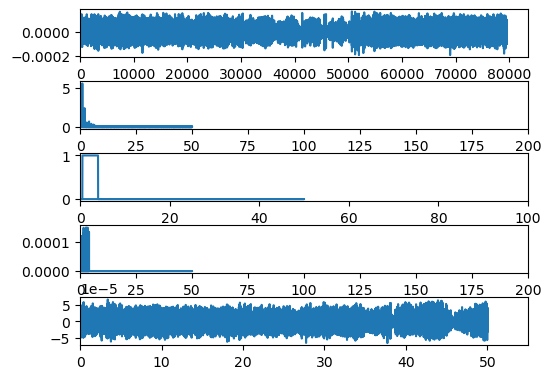

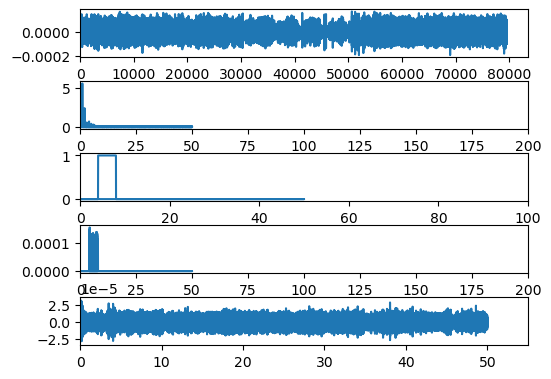

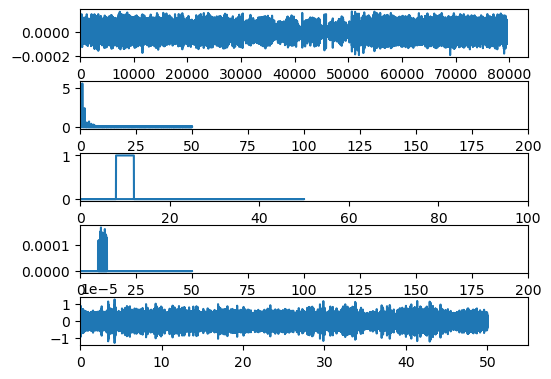

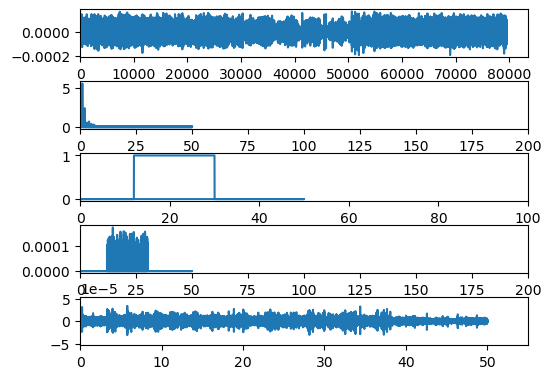

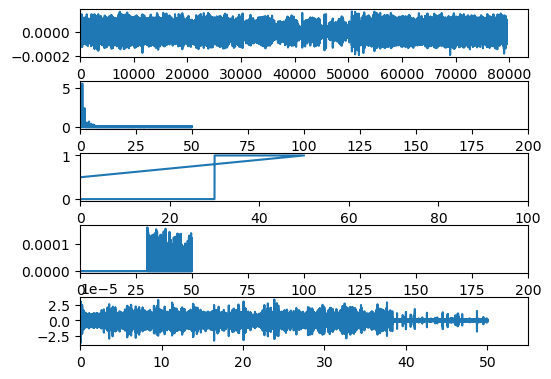

In [14]:
clean_x = (data[0]-data[0]*passe_bande(49.9,50.1)) #50Hz

traitement_signal(clean_x,0.5,4) #Delta

traitement_signal(clean_x,4,8) #Theta

traitement_signal(clean_x,8,12) #Alpha

traitement_signal(clean_x,12,30) #Beta

traitement_signal(clean_x,30,100) #Gamma